In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel('/Users/DaveManderson/Documents/SQL extract/SQL_Trans.xlsx')

In [3]:
df['fullldate'] = pd.to_datetime(df['fullldate'])

In [4]:
#Set 'date' as the index
df.set_index('fullldate', inplace=True)

#Daily aggregates
daily = df.resample('D').agg({
    'Amount': ['sum', 'mean', 'count']
})

#Weekly aggregates
weekly = df.resample('W').agg({
    'Amount': ['sum', 'mean', 'count']
})

#Monthly aggregates
monthly = df.resample('M').agg({
    'Amount': ['sum', 'mean', 'count']
})

#Yearly aggregates
yearly = df.resample('A').agg({
    'Amount': ['sum', 'mean', 'count']
})

#Renaming columns for ease
daily.columns = ['Daily_Sum', 'Daily_Avg', 'Daily_Count']
weekly.columns = ['Weekly_Sum', 'Weekly_Avg', 'Weekly_Count']
monthly.columns = ['Monthly_Sum', 'Monthly_Avg', 'Monthly_Count']
yearly.columns = ['Yearly_Sum', 'Yearly_Avg', 'Yearly_Count']

#Print the results
print("Daily Aggregation:")
print(daily.head())
print("\nWeekly Aggregation:")
print(weekly.head())
print("\nMonthly Aggregation:")
print(monthly.head())
print("\nYearly Aggregation:")
print(yearly.head())

Daily Aggregation:
               Daily_Sum     Daily_Avg  Daily_Count
fullldate                                          
2013-01-01  23366.539551  11683.269775            2
2013-01-02  21180.459961  10590.229980            2
2013-01-03  58257.640045  11651.528009            5
2013-01-04  48429.200195  16143.066732            3
2013-01-05  61579.188965  15394.797241            4

Weekly Aggregation:
               Weekly_Sum    Weekly_Avg  Weekly_Count
fullldate                                            
2013-01-06  215756.448639  12691.555802            17
2013-01-13  399882.560547  12117.653350            33
2013-01-20  265332.262085  12634.869623            21
2013-01-27  381217.253418  14119.157534            27
2013-02-03  640186.509064  10850.618798            59

Monthly Aggregation:
             Monthly_Sum   Monthly_Avg  Monthly_Count
fullldate                                            
2013-01-31  1.729421e+06  12265.397473            141
2013-02-28  3.891717e+06  12086.07

      fullldate  Transactions_Count  Average_Amount  Transactions_sum
0    2013-01-01                   2    11683.269775      2.336654e+04
1    2013-01-02                   2    10590.229980      2.118046e+04
2    2013-01-03                   5    11651.528009      5.825764e+04
3    2013-01-04                   3    16143.066732      4.842920e+04
4    2013-01-05                   4    15394.797241      6.157919e+04
...         ...                 ...             ...               ...
1150 2016-02-25                 107    12308.512935      1.317011e+06
1151 2016-02-26                 120    11598.145358      1.391777e+06
1152 2016-02-27                  86    11590.798482      9.968087e+05
1153 2016-02-28                  92    11708.758365      1.077206e+06
1154 2016-02-29                3698    12098.111217      4.473882e+07

[1155 rows x 4 columns]


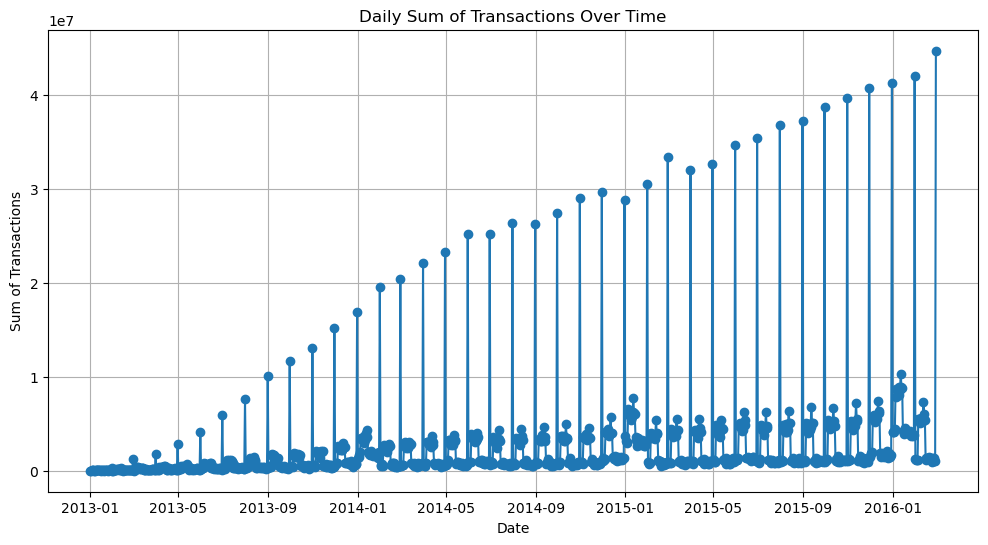

In [5]:
daily_data = df.groupby('fullldate').agg(Transactions_Count=('Amount', 'size'),
                                         Average_Amount=('Amount', 'mean'),
                                         Transactions_sum=('Amount', 'sum')).reset_index()

# Now you have the daily_data DataFrame ready for analysis
print(daily_data)

# To analyze the increase, you might want to look at trends over time.
# Plotting the daily sum can give a visual of how it changes day-to-day.
plt.figure(figsize=(12, 6))
plt.plot(daily_data['fullldate'], daily_data['Transactions_sum'], marker='o')
plt.title('Daily Sum of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Sum of Transactions')
plt.grid(True)
plt.show()

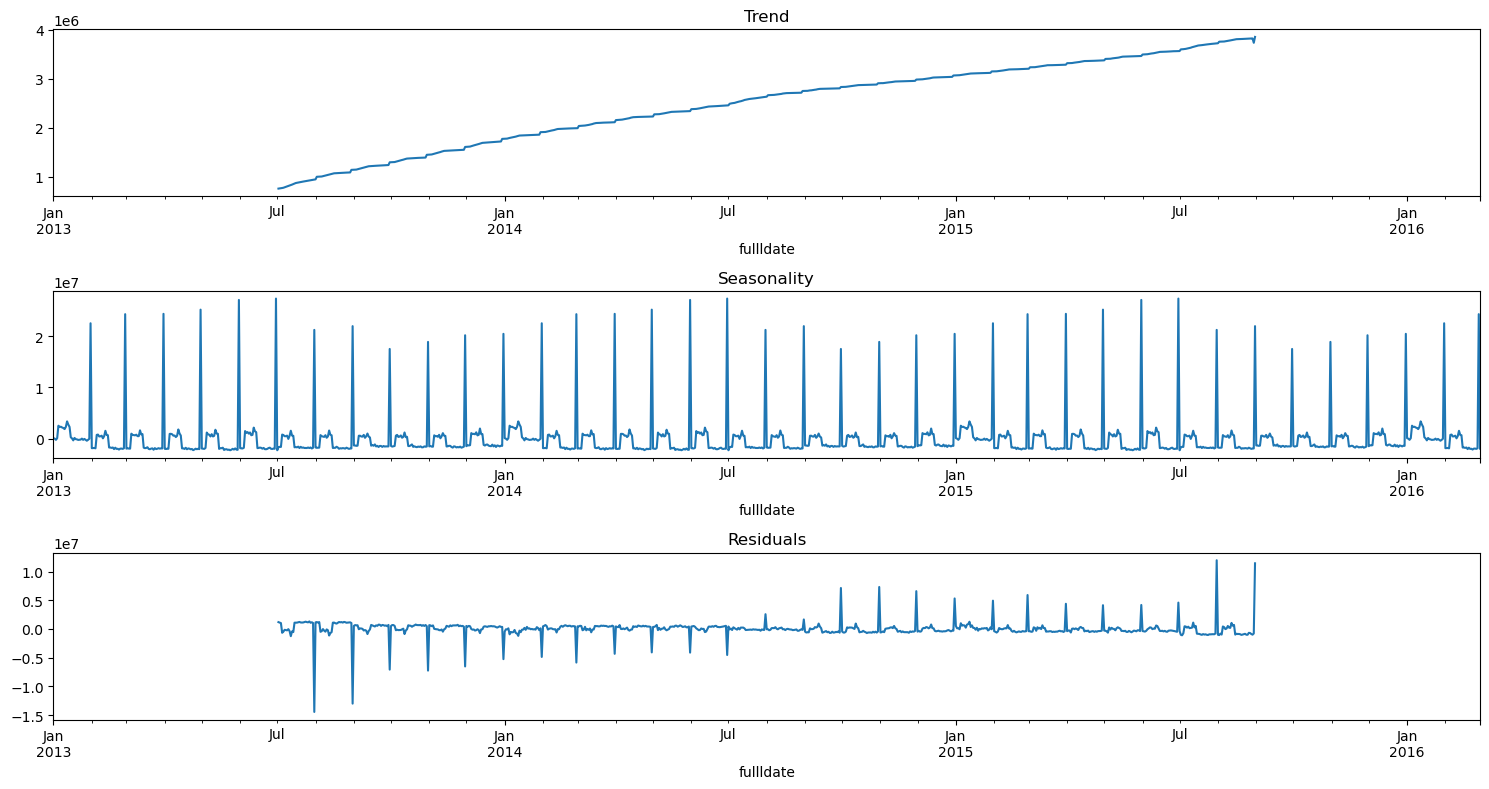

Correlation matrix:
                     Transactions_Count  Average_Amount
Transactions_Count            1.000000        0.003949
Average_Amount                0.003949        1.000000


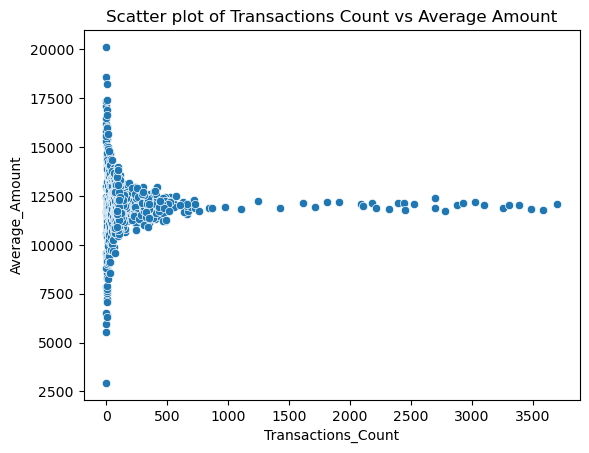

Outliers:
             Transactions_Count  Average_Amount  Transactions_sum  z_scores
fullldate                                                                 
2014-01-31                1613    12105.242949      1.952576e+07  3.460137
2014-02-28                1710    11928.524509      2.039778e+07  3.636851
2014-03-31                1815    12181.897146      2.211014e+07  3.983860
2014-04-30                1912    12180.584430      2.328928e+07  4.222810
2014-05-31                2089    12089.164984      2.525427e+07  4.621013
2014-06-30                2110    11952.969507      2.522077e+07  4.614224
2014-07-31                2179    12112.729549      2.639364e+07  4.851906
2014-08-31                2216    11881.287757      2.632893e+07  4.838793
2014-09-30                2320    11827.351189      2.743945e+07  5.063839
2014-10-31                2394    12141.308770      2.906629e+07  5.393516
2014-11-30                2446    12146.713543      2.971086e+07  5.524137
2014-12-31    

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose



# Ensure the date column is a datetime type and set it as the DataFrame's index
daily_data.set_index('fullldate', inplace=True)

# Decompose the time series to identify trend and seasonality
decomposition = seasonal_decompose(daily_data['Transactions_sum'], model='additive', period=365)

# Plot the decomposed components of the time series
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 8))
decomposition.trend.plot(ax=ax1, title='Trend')
decomposition.seasonal.plot(ax=ax2, title='Seasonality')
decomposition.resid.plot(ax=ax3, title='Residuals')
plt.tight_layout()
plt.show()

# Check the correlation between Transactions_Count and Average_Amount
correlation = daily_data[['Transactions_Count', 'Average_Amount']].corr()
print("Correlation matrix:\n", correlation)

# Scatter plot to visualize the correlation
sns.scatterplot(data=daily_data, x='Transactions_Count', y='Average_Amount')
plt.title('Scatter plot of Transactions Count vs Average Amount')
plt.show()

# Identify potential outliers in Transactions_sum
# Calculate the z-scores
daily_data['z_scores'] = (daily_data['Transactions_sum'] - daily_data['Transactions_sum'].mean()) / daily_data['Transactions_sum'].std()

# Find where the z-score is greater than 3 or less than -3
outliers = daily_data[daily_data['z_scores'].abs() > 3]
print("Outliers:\n", outliers)


In [7]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 2014-01-31 to 2016-02-29
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transactions_Count  26 non-null     int64  
 1   Average_Amount      26 non-null     float64
 2   Transactions_sum    26 non-null     float64
 3   z_scores            26 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.0 KB


Detailed data for outlier days:


,Transactions_Count,Average_Amount,Transactions_sum,z_scores
fullldate,,,,
2014-01-31,1613,12105.242949,1.952576e+07,3.460137
2014-02-28,1710,11928.524509,2.039778e+07,3.636851
2014-03-31,1815,12181.897146,2.211014e+07,3.983860
2014-04-30,1912,12180.584430,2.328928e+07,4.222810
2014-05-31,2089,12089.164984,2.525427e+07,4.621013
2014-06-30,2110,11952.969507,2.522077e+07,4.614224
2014-07-31,2179,12112.729549,2.639364e+07,4.851906
2014-08-31,2216,11881.287757,2.632893e+07,4.838793
2014-09-30,2320,11827.351189,2.743945e+07,5.063839


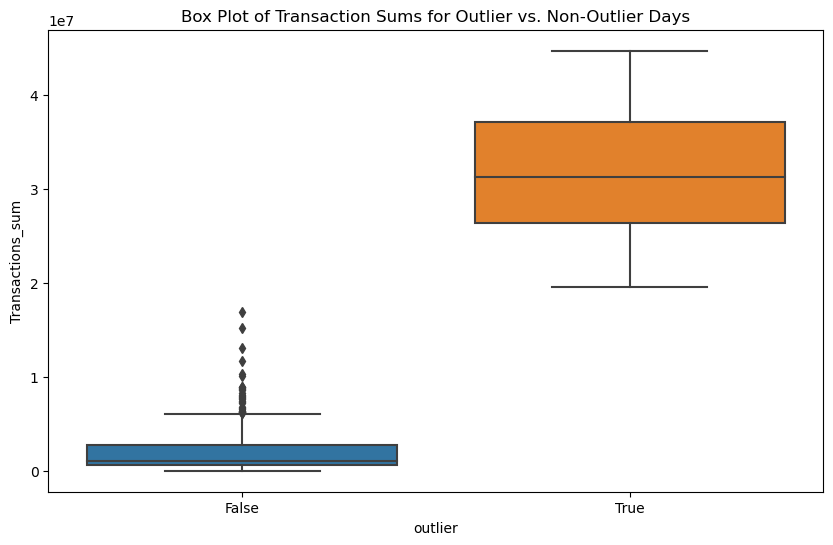

Summary statistics for outlier days:


,Transactions_Count,Average_Amount,Transactions_sum,z_scores
count,26.000000,26.000000,2.600000e+01,26.000000
mean,2637.807692,12015.720982,3.167515e+07,5.922199
std,599.126365,161.399782,7.115832e+06,1.442016
min,1613.000000,11737.418111,1.952576e+07,3.460137
25%,2188.250000,11882.987094,2.634511e+07,4.842071
50%,2609.000000,12037.218846,3.127683e+07,5.841480
75%,3080.750000,12114.718066,3.712505e+07,7.026615
max,3698.000000,12390.573121,4.473882e+07,8.569537


Summary statistics for normal days:


,Transactions_Count,Average_Amount,Transactions_sum,z_scores
count,1129.000000,1129.000000,1.129000e+03,1129.000000
mean,148.100089,11997.083325,1.778219e+06,-0.136384
std,159.354832,1238.829511,1.910790e+06,0.387220
min,1.000000,2943.419922,2.943420e+03,-0.496141
25%,48.000000,11534.938256,5.609063e+05,-0.383071
50%,83.000000,12003.178477,9.947612e+05,-0.295151
75%,237.000000,12502.706138,2.791760e+06,0.069009
max,1428.000000,20112.589844,1.694204e+07,2.936548


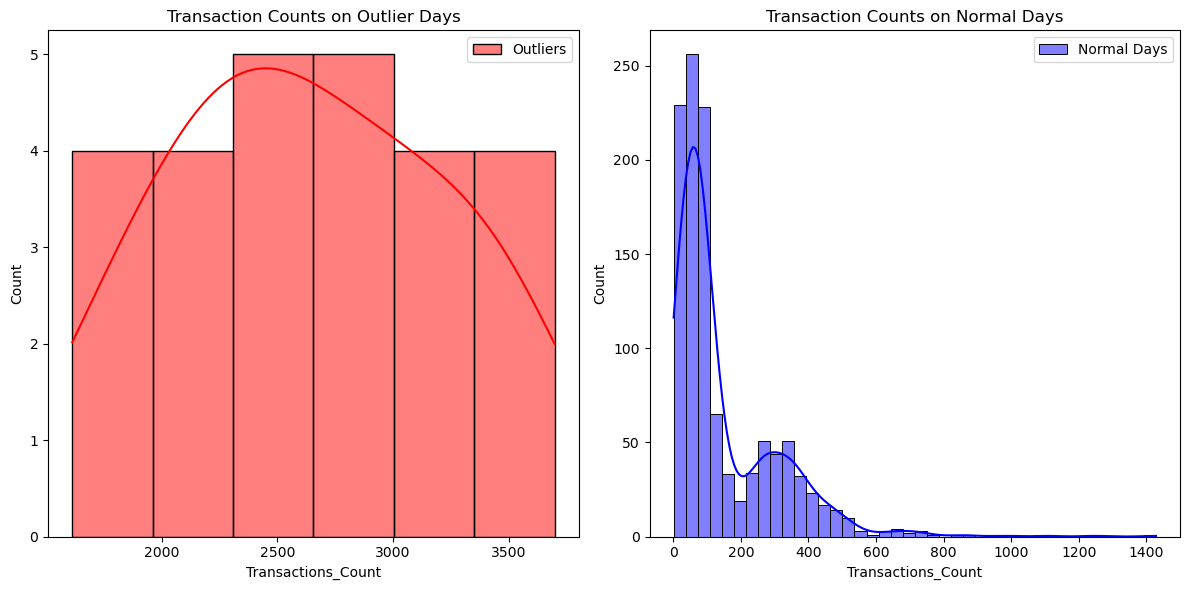

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'daily_data' is already defined and includes a column for z-scores and transactions data
# You've already identified outliers, let's delve deeper

# Step 1: Print details of outlier days
print("Detailed data for outlier days:")
display(outliers)

# Step 2: Plotting transaction sums on outlier days vs. non-outlier days
# Let's visualize the difference in transaction sums
plt.figure(figsize=(10, 6))
sns.boxplot(x='outlier', y='Transactions_sum', data=daily_data.assign(outlier=daily_data['z_scores'].abs() > 3))
plt.title('Box Plot of Transaction Sums for Outlier vs. Non-Outlier Days')
plt.show()

# Step 3: Explore any particular trends or patterns on outlier days
# For instance, compare average transaction amounts or counts
outlier_days_data = daily_data[daily_data['z_scores'].abs() > 3]
normal_days_data = daily_data[daily_data['z_scores'].abs() <= 3]

# Summary statistics for outlier days
print("Summary statistics for outlier days:")
display(outlier_days_data.describe())

# Summary statistics for normal days
print("Summary statistics for normal days:")
display(normal_days_data.describe())

# Optionally, plot transaction counts to see the distribution on outlier vs. normal days
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(outlier_days_data['Transactions_Count'], kde=True, color='red', label='Outliers')
plt.title('Transaction Counts on Outlier Days')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(normal_days_data['Transactions_Count'], kde=True, color='blue', label='Normal Days')
plt.title('Transaction Counts on Normal Days')
plt.legend()

plt.tight_layout()
plt.show()


Correlation of Transaction Count with Transaction Sum: 0.9997722530514346
Correlation of Average Amount with Transaction Sum: 0.012172327826816315


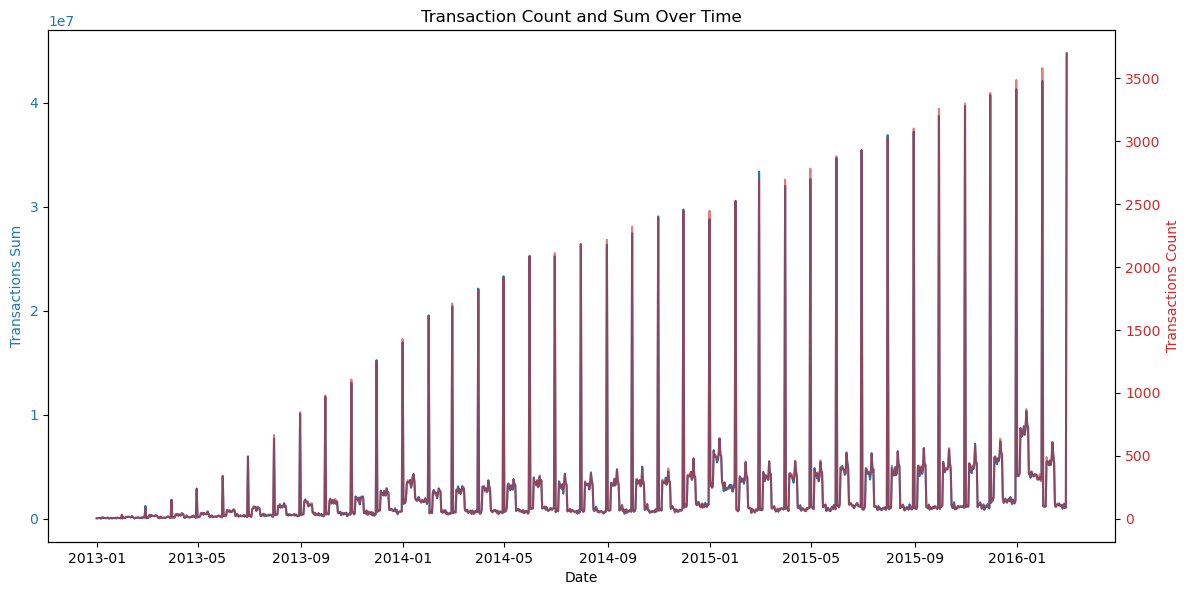

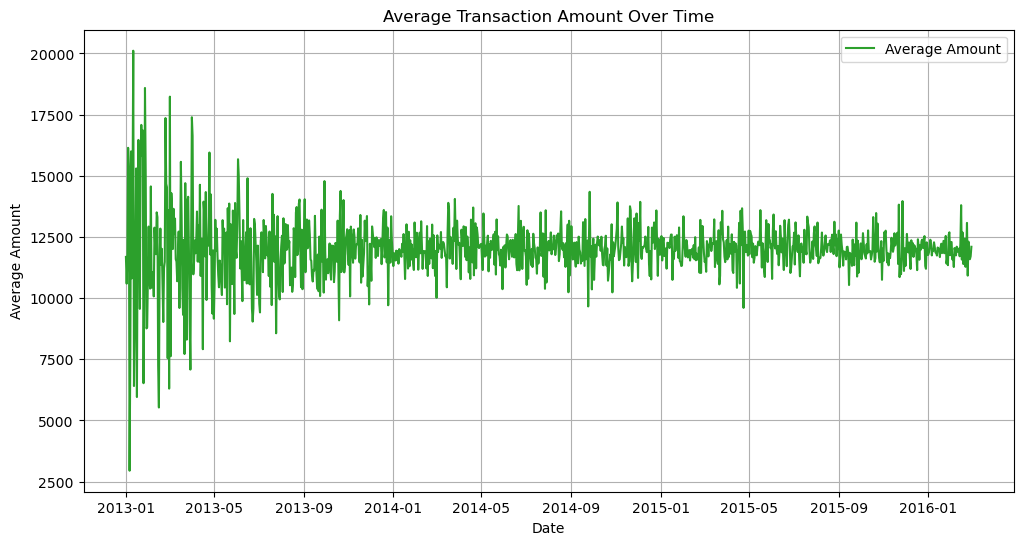

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'daily_data' already has 'fullldate' as the datetime index
# Calculate correlation of 'Transactions_Count' and 'Average_Amount' with 'Transactions_sum'
correlation_count_sum = daily_data['Transactions_Count'].corr(daily_data['Transactions_sum'])
correlation_avg_sum = daily_data['Average_Amount'].corr(daily_data['Transactions_sum'])

print(f"Correlation of Transaction Count with Transaction Sum: {correlation_count_sum}")
print(f"Correlation of Average Amount with Transaction Sum: {correlation_avg_sum}")

# Plotting the trends over time
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Transactions Sum', color=color)
ax1.plot(daily_data.index, daily_data['Transactions_sum'], color=color, label='Transactions Sum')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:red'
ax2.set_ylabel('Transactions Count', color=color)  # We already handled the x-label with ax1
ax2.plot(daily_data.index, daily_data['Transactions_Count'], color=color, label='Transactions Count', alpha=0.6)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # Otherwise the right y-label is slightly clipped
plt.title('Transaction Count and Sum Over Time')
plt.show()

# Plotting the average amount separately for clarity
plt.figure(figsize=(12, 6))
sns.lineplot(data=daily_data, x=daily_data.index, y='Average_Amount', color='tab:green', label='Average Amount')
plt.title('Average Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Average Amount')
plt.grid(True)
plt.show()


Q1 - Analyse the average and count to determine which has contributed the most towards the steady increase in the summed transaction amounts.

Based on the visuals and the correlation coefficients, it seems clear that the transaction count has a very strong positive correlation with the transaction sum, whereas the average amount has a very weak correlation.

Correlation of Transaction Count with Transaction Sum: The value is very close to 1, indicating a strong positive correlation. This means that as the number of transactions increases, the total transaction sum also increases correspondingly.

Correlation of Average Amount with Transaction Sum: The value is positive but very close to 0, suggesting that there is almost no linear relationship between the average transaction amount and the sum of transactions.
From this analysis, it is evident that the number of transactions (Transaction Count) is the primary driver for the increase in the summed transaction amounts over time, not the average amount of the transactions.

In the dual-axis plot, you can see this visually as well: the transaction sum closely follows the pattern of the transaction count.

In the average transaction amount plot, the average amount seems to fluctuate within a range without a clear increasing or decreasing trend, which supports the weak correlation found.

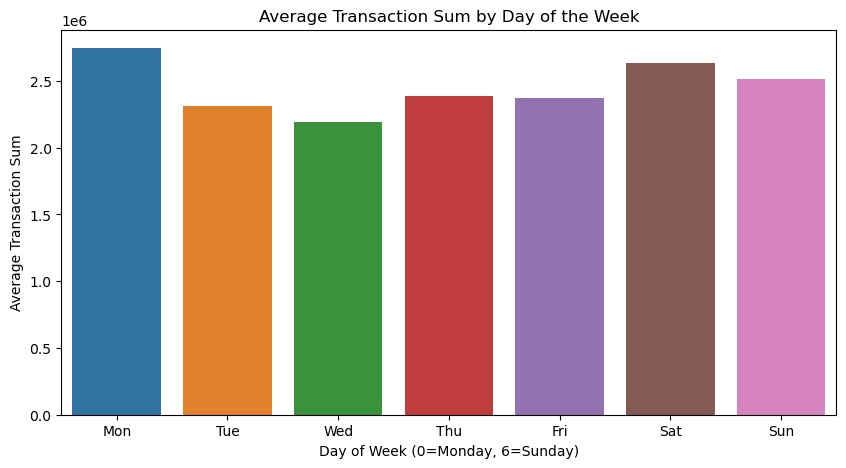

In [10]:
# First, let's ensure 'fullldate' is converted to datetime and set as the index.
# If 'fullldate' is not already the index, we'll set it.
if not isinstance(daily_data.index, pd.DatetimeIndex):
    daily_data['fullldate'] = pd.to_datetime(daily_data['fullldate'])
    daily_data.set_index('fullldate', inplace=True)

# Now, we can add the 'day_of_week' column.
daily_data['day_of_week'] = daily_data.index.dayofweek

# Proceed with grouping by 'day_of_week' and plotting.
weekday_avg = daily_data.groupby('day_of_week')['Transactions_sum'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values)
plt.title('Average Transaction Sum by Day of the Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Transaction Sum')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()



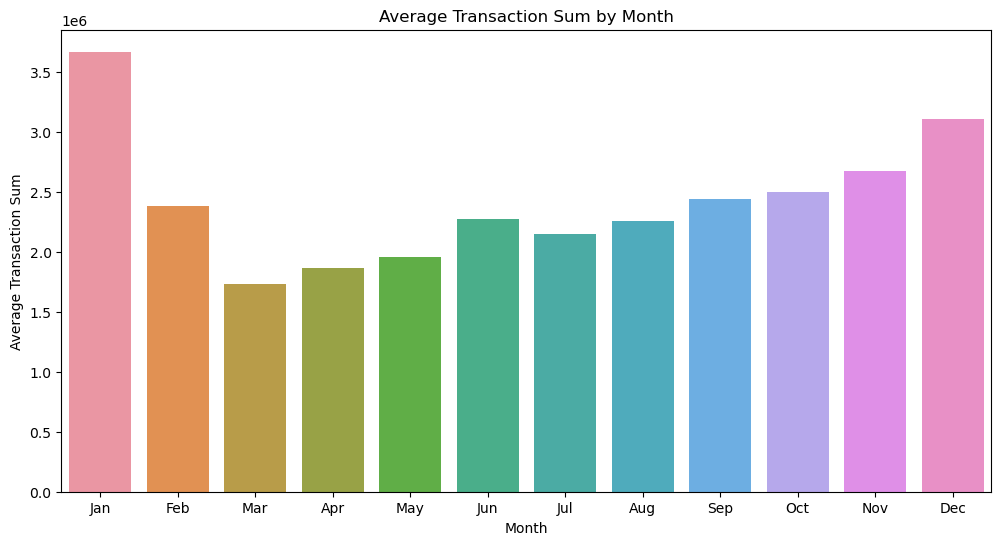

In [11]:
# Extract the month from the index
daily_data['month'] = daily_data.index.month

# Group by month and calculate the mean transaction sum for each month
monthly_avg = daily_data.groupby('month')['Transactions_sum'].mean()

# Plot the average transaction sum by month
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average Transaction Sum by Month')
plt.xlabel('Month')
plt.ylabel('Average Transaction Sum')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


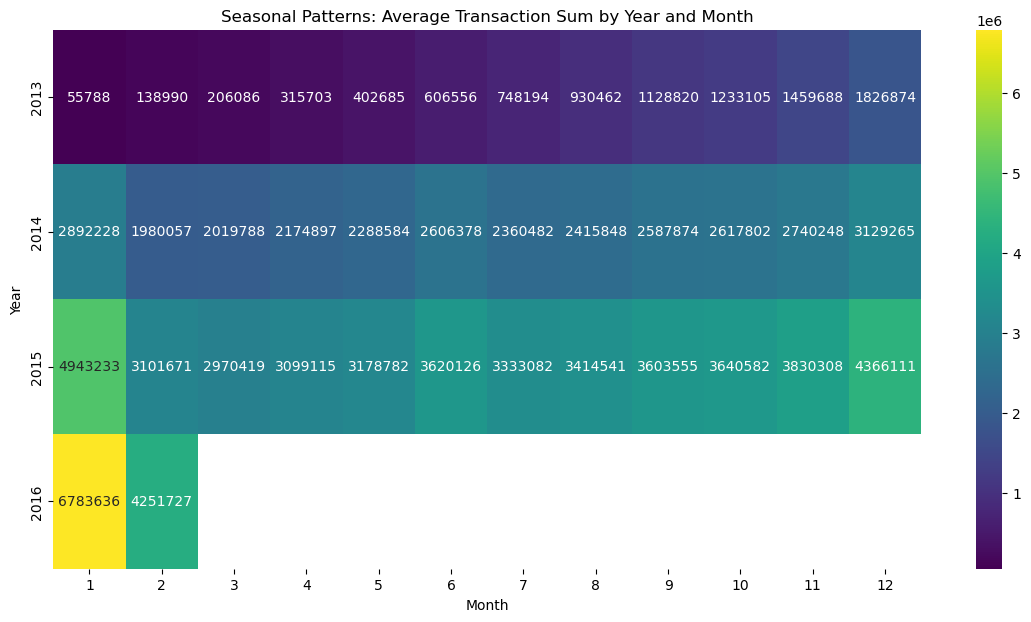

In [12]:
# Add a 'year' column to daily_data
daily_data['year'] = daily_data.index.year

# Now group by both year and month to observe seasonal patterns
year_month_avg = daily_data.groupby(['year', 'month'])['Transactions_sum'].mean().unstack()

# Plot the seasonal patterns
plt.figure(figsize=(14, 7))
sns.heatmap(year_month_avg, cmap='viridis', annot=True, fmt=".0f")
plt.title('Seasonal Patterns: Average Transaction Sum by Year and Month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


Q2 - Patterns in Weeks, Months and Years. 

Weekly Patterns:
From the first chart, it appears that the average transaction sum by day of the week does not show a significant difference from Monday through Sunday. While there might be minor fluctuations, the values across days of the week are relatively consistent. This indicates that there is no significant weekly seasonality affecting the average transaction sums; that is, no particular day of the week consistently experiences higher transaction volumes than the others.

Monthly Patterns:
The second chart displays a clear monthly pattern in the average transaction sum. January and December appear to have higher average transaction sums than other months, which might suggest a seasonal influence, possibly due to holiday shopping or end-of-year activities. February's average sum is substantially lower than that of July, indicating that the transaction fluctuations are not the same across these two months. This could be due to several factors, including the difference in the number of days or seasonal consumer behavior.

Yearly Seasonal Patterns:
The third chart, a heatmap, illustrates the seasonal patterns of average transaction sums by year and month. The colors indicate the magnitude of transaction sums, with darker colors typically representing higher values. There is a noticeable trend of increasing transaction sums as the years progress, which may reflect business growth, market expansion, or inflationary effects. There also appears to be seasonality within each year, with some months consistently showing higher transaction sums. Notably, the beginning and the end of each year tend to have higher sums, possibly due to new year spending and holiday seasons.

In conclusion:

Weeks: No significant weekday or business day pattern is observed.

Months: There is a pattern with higher average transaction sums in January and December, and lower sums in February compared to July, indicating that not all months experience the same level of transaction activity.

Years: There is a clear seasonal pattern evident within each year, with increasing trends over the years.

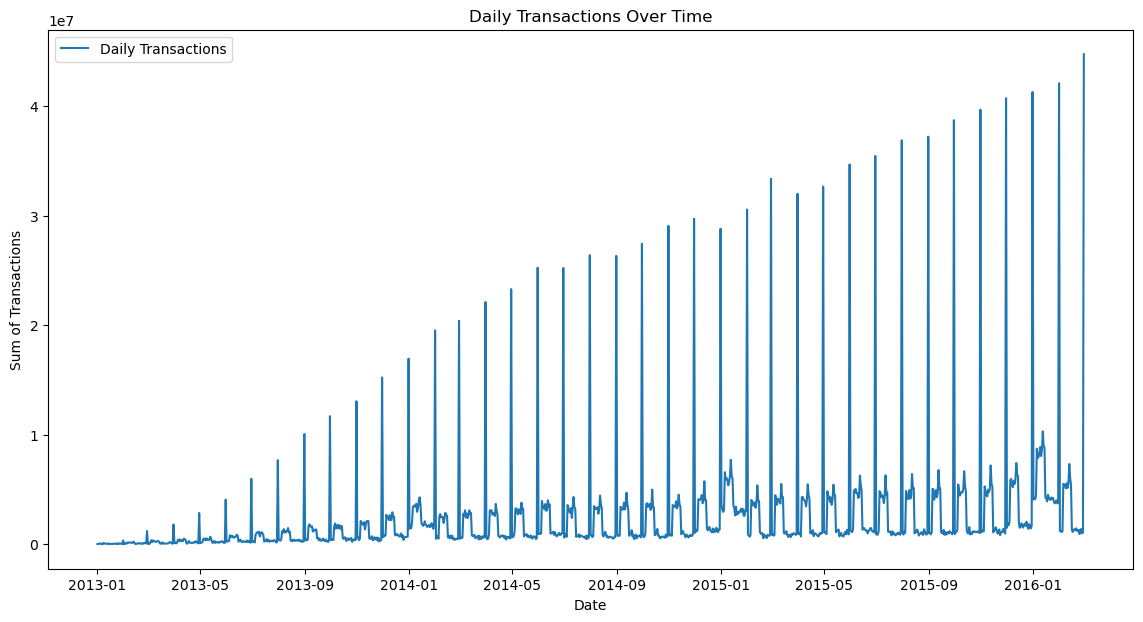

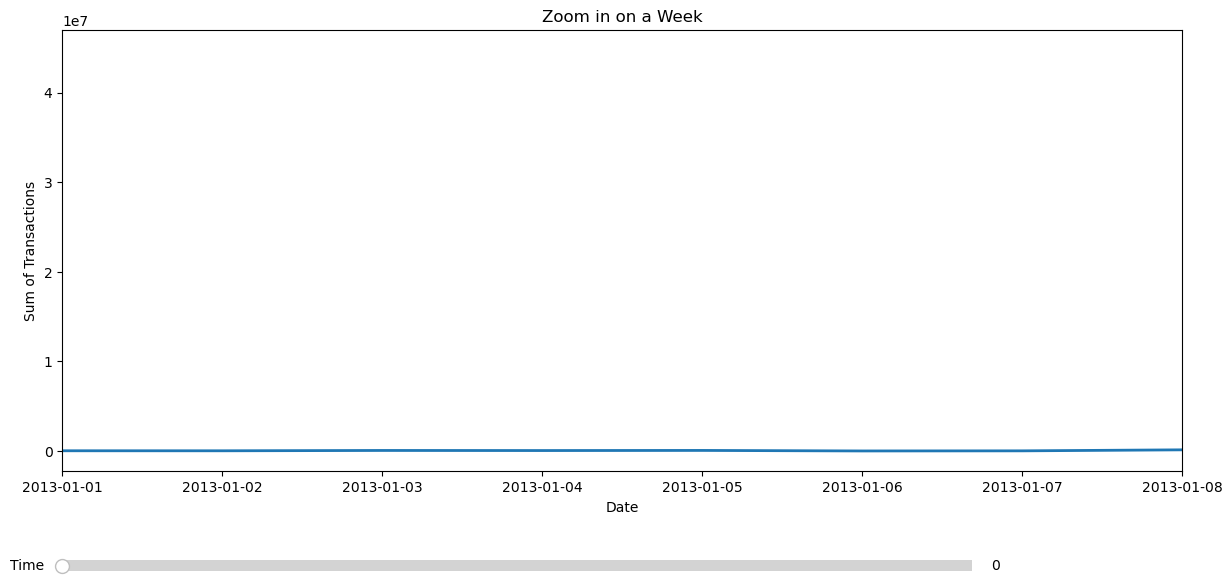

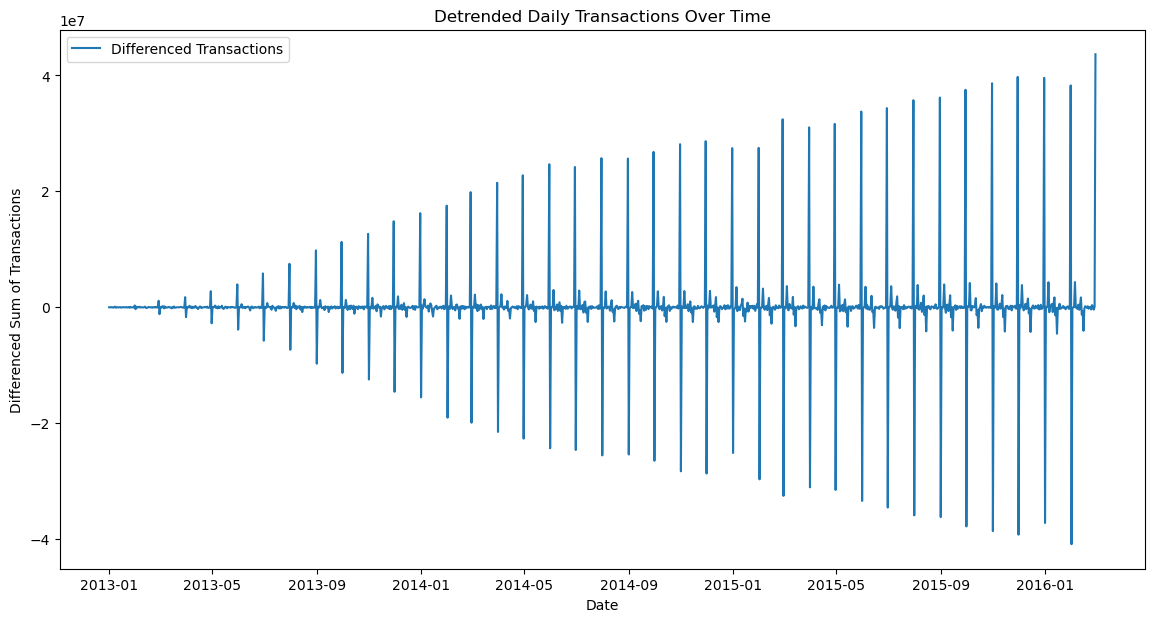

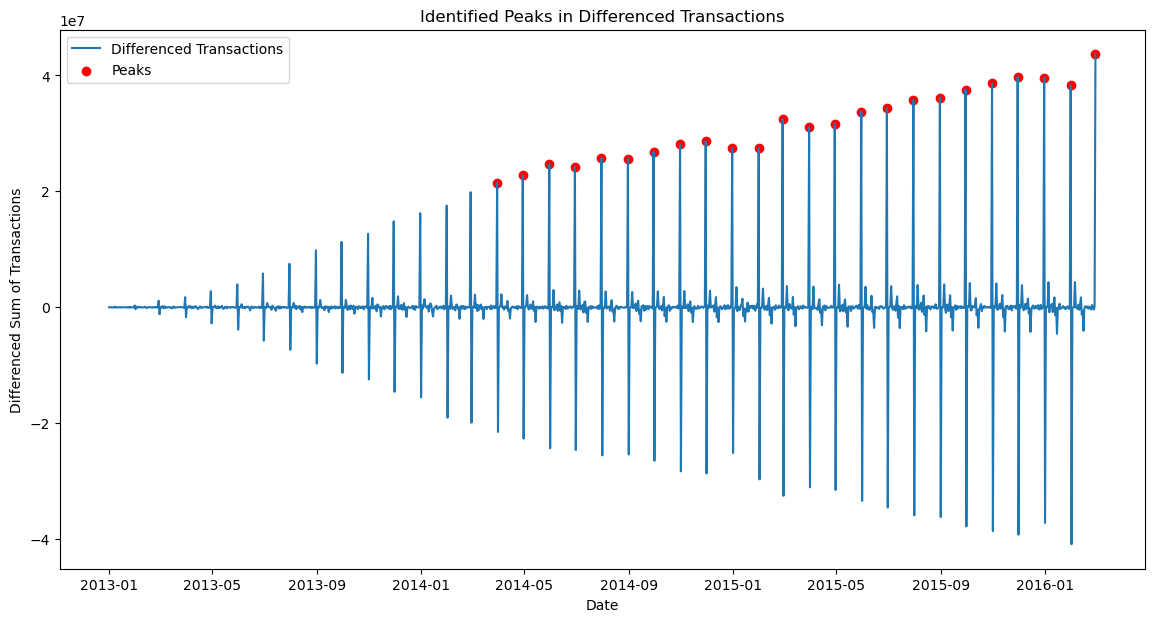

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

# Load your data
# daily_data = pd.read_excel('path_to_your_file.xlsx')

# Ensure 'fullldate' is the index and it's in datetime format (assuming it's already done)

# Plot the entire time series data
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['Transactions_sum'], label='Daily Transactions')
plt.title('Daily Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Sum of Transactions')
plt.legend()
plt.show()

# Interactive plot with a slider to zoom in on a particular period
fig, ax = plt.subplots(figsize=(14, 7))
plt.subplots_adjust(left=0.1, bottom=0.25)
l, = plt.plot(daily_data.index, daily_data['Transactions_sum'], lw=2)
plt.title('Zoom in on a Week')
plt.xlabel('Date')
plt.ylabel('Sum of Transactions')

# Set the default x-limits
ax.set_xlim(daily_data.index.min(), daily_data.index.min() + pd.Timedelta(weeks=1))

# Create the slider
axcolor = 'lightgoldenrodyellow'
ax_slider = plt.axes([0.1, 0.1, 0.65, 0.03], facecolor=axcolor)
slider = Slider(ax_slider, 'Time', 0, len(daily_data) - 1, valinit=0, valstep=1)

# Update function to change the view range
def update(val):
    pos = slider.val
    ax.set_xlim(daily_data.index[int(pos)], daily_data.index[int(pos)] + pd.Timedelta(weeks=1))
    fig.canvas.draw_idle()

slider.on_changed(update)

plt.show()

# Detrend the data by differencing to make the series stationary
daily_data['Transactions_diff'] = daily_data['Transactions_sum'].diff().fillna(0)

# Plot the detrended data to see peaks
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['Transactions_diff'], label='Differenced Transactions')
plt.title('Detrended Daily Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Differenced Sum of Transactions')
plt.legend()
plt.show()

# Identify the specific peaks above a certain threshold
# Here, we choose a threshold as an example (e.g., mean + 3*std)
threshold = daily_data['Transactions_diff'].mean() + 3*daily_data['Transactions_diff'].std()
peaks = daily_data[daily_data['Transactions_diff'] >= threshold]

# Plot the peaks
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['Transactions_diff'], label='Differenced Transactions')
plt.scatter(peaks.index, peaks['Transactions_diff'], color='red', label='Peaks')
plt.title('Identified Peaks in Differenced Transactions')
plt.xlabel('Date')
plt.ylabel('Differenced Sum of Transactions')
plt.legend()
plt.show()


Daily Transactions Over Time:
The first plot shows a clear upward trend in daily transactions over the years. It's apparent that there's seasonality within the data, with regular peaks that may correspond to specific times of the year.

Zoom in on a Week:
The zoomed-in view gives a better understanding of transaction volumes on a more granular level. However, this specific plot doesn't show significant variation or notable peaks within the week presented.

Detrended Daily Transactions Over Time:
After detrending, the plot still shows peaks, but without the influence of the overall increasing trend. This helps to see the fluctuations in transaction volumes more clearly.

In [14]:
# Define a threshold for identifying peaks, here we're using the 95th percentile as an example
threshold = daily_data['Transactions_sum'].quantile(0.95)

# Identify the dates where transaction sums exceed the threshold
peak_dates = daily_data[daily_data['Transactions_sum'] >= threshold].index

# Print out the peak dates
print("Peak Dates:")
print(peak_dates)

Peak Dates:
DatetimeIndex(['2013-07-31', '2013-08-31', '2013-09-30', '2013-10-31',
               '2013-11-30', '2013-12-31', '2014-01-31', '2014-02-28',
               '2014-03-31', '2014-04-30', '2014-05-31', '2014-06-30',
               '2014-07-31', '2014-08-31', '2014-09-30', '2014-10-31',
               '2014-11-30', '2014-12-31', '2015-01-05', '2015-01-07',
               '2015-01-11', '2015-01-12', '2015-01-13', '2015-01-31',
               '2015-02-28', '2015-03-31', '2015-04-30', '2015-05-31',
               '2015-06-12', '2015-06-30', '2015-07-12', '2015-07-31',
               '2015-08-12', '2015-08-31', '2015-09-12', '2015-09-30',
               '2015-10-12', '2015-10-31', '2015-11-12', '2015-11-30',
               '2015-12-12', '2015-12-13', '2015-12-14', '2015-12-31',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10', '2016-01-11', '2016-01-12',
               '2016-01-13', '2016-01-14', '2016-01-31', '2016-02

End-of-Month Peaks: There are consistent peaks at the end of almost every month. This could be due to a variety of factors:
Payday: Many companies process payroll at the end of the month, which can result in an increase in banking transactions as employees receive their wages.
Automatic Payments: Monthly bills, such as utilities, rent, or mortgage payments, are often due at the end of the month, leading to automatic transactions.

Regular Early-Year Activity: In January 2015 and 2016, there's a cluster of peak dates. This could be due to:
Year-End Bonuses or Adjustments: If companies pay out bonuses or make other financial adjustments at the beginning of the year, this could lead to an increase in transactions.
New Year Transactions: People might engage in financial planning, investment, and savings activities at the beginning of a new year.
Post-Holiday Season: Payment of holiday bills or the redeeming of gift checks and cards can also lead to increased activity.

Absence of Late February Peaks Before 2016: There is a noticeable absence of end-of-month peaks for February in 2013-2015 but not in 2016. This might warrant further investigation:
Leap Year Factor: February 2016 is a leap year, so there might be transactions delayed until the 29th, which doesn’t exist in other years.
Data Collection Anomaly: If it's not a leap year factor, it could be due to data collection or a genuine lack of end-of-month peak activity in February for those years.

January 2015 Daily Peaks: The consecutive daily peaks in early January 2015 are unusual and could suggest:
Backlogged Transactions: Transactions that were held over the end-of-year holidays might be processed en masse

Based on this analysis, the bank could infer that the end of the month, and to some extent the middle of the month, are periods of high liquidity demand. The bank should ensure that it has adequate reserves to cover these peaks in transaction volume.

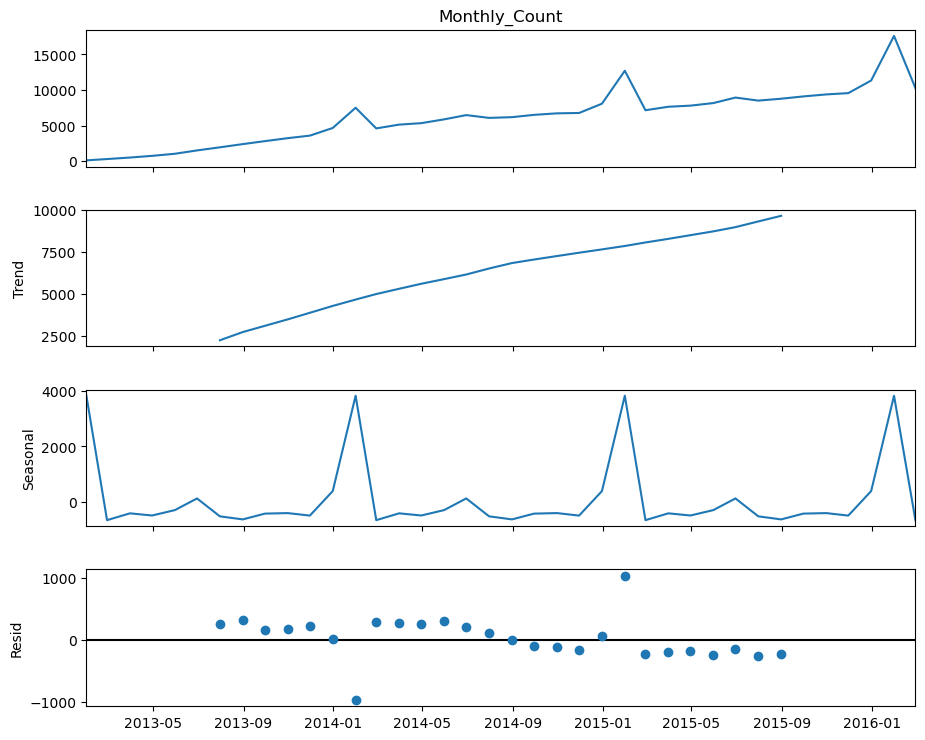

/Users/DaveManderson/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/DaveManderson/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


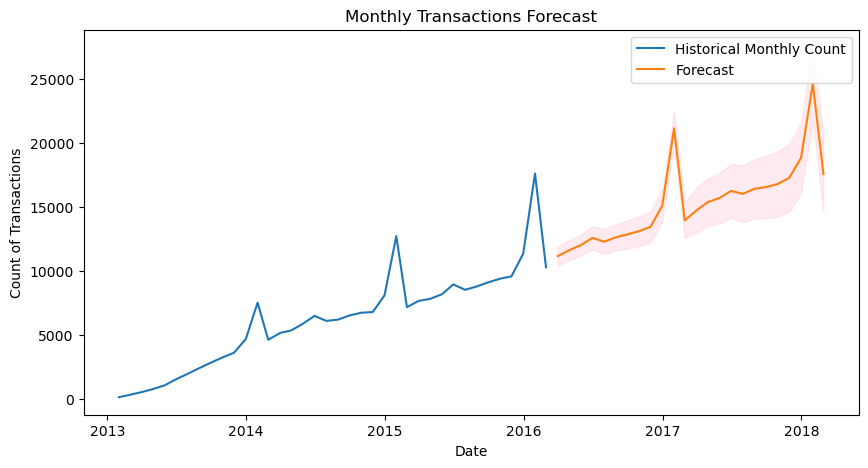

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose


# and contains the column 'Monthly_Count' with the data.

# Decompose the data to visualize and understand its components
decomposition = seasonal_decompose(monthly['Monthly_Count'], model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

# Define the p, d, q parameters for ARIMA
p = 16  # AR order
d = 1  # Differencing order
q = 1  # MA order

# Fit the ARIMA model
model = ARIMA(monthly['Monthly_Count'], order=(p, d, q))
results = model.fit()

# Forecast the next 24 months (2 years)
forecast = results.get_forecast(steps=24)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the historical data and the forecast with confidence intervals
plt.figure(figsize=(10, 5))
# Make sure to use monthly.index for the x-axis and monthly['Monthly_Count'] for the y-axis
plt.plot(monthly.index, monthly['Monthly_Count'], label='Historical Monthly Count')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Monthly Transactions Forecast')
plt.xlabel('Date')
plt.ylabel('Count of Transactions')
plt.legend()
plt.show()


In [16]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 2013-01-31 to 2016-02-29
Freq: M
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Monthly_Sum    38 non-null     float64
 1   Monthly_Avg    38 non-null     float64
 2   Monthly_Count  38 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.2 KB


In [17]:
pip install prophet


Note: you may need to restart the kernel to use updated packages.


16:09:27 - cmdstanpy - INFO - Chain [1] start processing
16:09:55 - cmdstanpy - INFO - Chain [1] done processing


Mean Absolute Percentage Error (MAPE): 15.29%


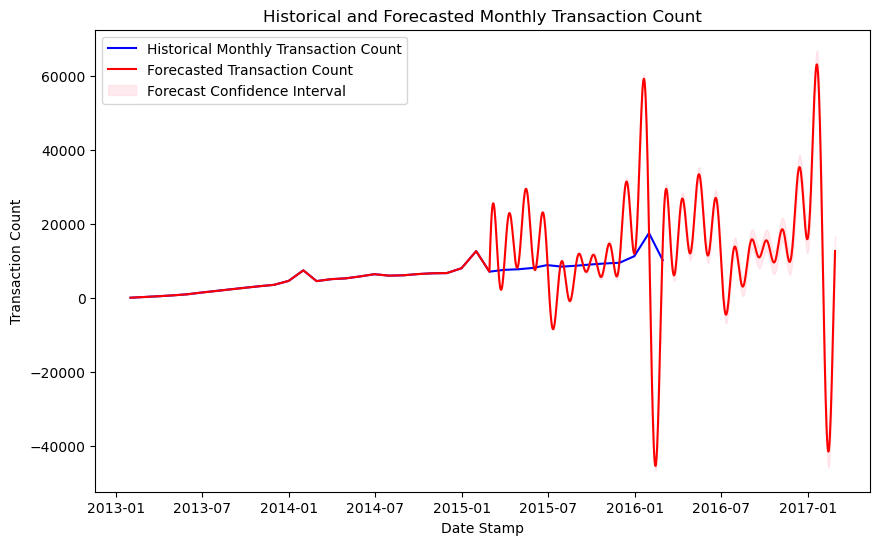

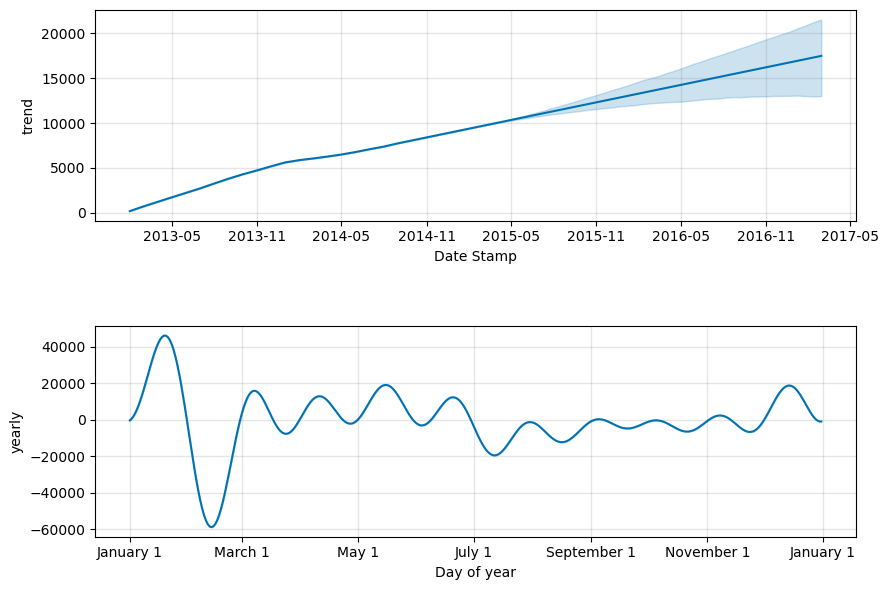

In [18]:
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

# Assuming 'monthly' is the DataFrame containing your data
# Prepare the data for Prophet
# Prophet requires the dataframe to have two columns: 'ds' (date stamp) and 'y'
# After resetting the index, the index column is named after the original index name or 'index' if it had no name
#prophet_data = monthly.reset_index().rename(columns={'index': 'ds', 'Monthly_Count': 'y'})

# If the above line gives an error, it could be that the index has a name
# In that case, uncomment the next line and comment the line above.
prophet_data = monthly.reset_index().rename(columns={monthly.index.name: 'ds', 'Monthly_Count': 'y'})

# Initialize the Prophet model with multiplicative seasonality
model = Prophet(seasonality_mode='additive')

# Split the data into training and testing sets to evaluate performance
split_date = prophet_data['ds'].max() - pd.Timedelta(days=365)
train_data = prophet_data[prophet_data['ds'] <= split_date]
test_data = prophet_data[prophet_data['ds'] > split_date]

# Fit the model on the training data
model.fit(train_data)

# Make a future dataframe for forecasting
future = model.make_future_dataframe(periods=730)  # Forecasting for the next two years

# Use the model to make a forecast
forecast = model.predict(future)

# Calculate performance on the test set
forecast_test = forecast[forecast['ds'].isin(test_data['ds'])]
mape = mean_absolute_percentage_error(test_data['y'], forecast_test['yhat'])
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2%}')

# Plot the forecast along with the historical data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(prophet_data['ds'], prophet_data['y'], 'b-', label='Historical Monthly Transaction Count')
ax.plot(forecast['ds'], forecast['yhat'], 'r-', label='Forecasted Transaction Count')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3, label='Forecast Confidence Interval')
plt.title('Historical and Forecasted Monthly Transaction Count')
plt.xlabel('Date Stamp')
plt.ylabel('Transaction Count')
plt.legend()
plt.show()

# Plot the forecast components
fig2 = model.plot_components(forecast)
plt.subplots_adjust(hspace=0.5)  # Adjust the space between plots
for ax in fig2.axes:
    xlabel = ax.get_xlabel()
    if xlabel == 'ds':  # Find and replace the label 'ds' with 'Date Stamp'
        ax.set_xlabel('Date Stamp')
plt.show()


In [19]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38 entries, 2013-01-31 to 2016-02-29
Freq: M
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Monthly_Sum    38 non-null     float64
 1   Monthly_Avg    38 non-null     float64
 2   Monthly_Count  38 non-null     int64  
dtypes: float64(2), int64(1)
memory usage: 1.2 KB
